In [2]:
#Importing all Required  Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
import math
#Library for one hot encoding
from sklearn.preprocessing import OneHotEncoder
#train test split
from sklearn.model_selection import train_test_split
#Evaluation metrics
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

C:\Users\rkkir\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
master_df=pd.read_csv("master_df.csv")

In [4]:
master_df

,Unnamed: 0,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,Model,Order Type,Plant,Print Status,Business Partner,Partner Type,Data Origin,Title,City,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
0,0,retail,67849,maharashtra,00:00:00,7005200002,49317,1203.14,general motors,spark,paid service,bc01,no,71941,Retail,Used Car Dealer,2.00,thane,Karnataka,2015-01-02 11:30:36,2014-12-13 14:29:43,2015,1,6900.76,477.01
1,1,retail,84419,maharashtra,00:00:00,7005200003,78584,804.26,tata,indica,smc value package,bc01,no,89441,Retail,Camp-Outdoor,2.00,thnae,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,2015,1,1198.32,19.92
2,2,retail,81055,maharashtra,00:00:00,7005200004,33985,180.19,maruti,zen,running repairs,bc01,no,85849,Retail,Ref-Customer,2.00,thane[w],Andhra Pradesh,2015-01-03 11:12:57,2015-01-02 11:40:44,2015,1,286.09,23.54
3,3,retail,84419,maharashtra,00:00:00,7005200005,78584,0.00,tata,indica,smc redemption,bc01,no,89441,Retail,Camp-Outdoor,2.00,thnae,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,2015,1,0.00,1.47
4,4,retail,18980,maharashtra,00:00:00,7005200006,50057,1202.97,hyundai,santro xing,paid service,bc01,no,20291,Retail,Ref-Customer,2.00,thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,2015,1,4291.27,25.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479544,492051,retail,203820,tamil nadu,00:00:00,7231000017,72546,2495.90,maruti,alto,paid service,x405,no,214278,Retail,Newspaper AD,2.00,chennai,Tamil Nadu,2016-06-30 14:56:58,2016-06-30 09:15:12,2016,6,6420.40,5.70
479545,492052,retail,170411,tamil nadu,00:00:00,7231000018,18968,2443.47,nissan,micra,paid service,x405,no,179429,Retail,Ref-Employee,2.00,chennai,Tamil Nadu,2016-06-30 15:06:52,2016-06-30 08:42:15,2016,6,11220.69,6.41
479546,492053,retail,48811,tamil nadu,00:00:00,7231000019,177433,2598.92,mahindra,scorpio crde,paid service,x405,no,52039,Retail,Spotted outlet,2.00,chennai,Tamil Nadu,2016-06-30 15:43:56,2016-06-30 08:27:51,2016,6,15776.50,7.27
479547,492054,retail,204067,tamil nadu,00:00:00,7231000020,22932,11000.00,honda,amaze,accidental,x405,no,214514,Retail,Spotted outlet,2.00,chennai,Tamil Nadu,2016-06-30 15:58:59,2016-06-30 12:53:48,2016,6,11200.00,3.09


In [5]:
master_df.drop(["Unnamed: 0"],1,inplace=True)

In [6]:
master_df

,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,Model,Order Type,Plant,Print Status,Business Partner,Partner Type,Data Origin,Title,City,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
0,retail,67849,maharashtra,00:00:00,7005200002,49317,1203.14,general motors,spark,paid service,bc01,no,71941,Retail,Used Car Dealer,2.00,thane,Karnataka,2015-01-02 11:30:36,2014-12-13 14:29:43,2015,1,6900.76,477.01
1,retail,84419,maharashtra,00:00:00,7005200003,78584,804.26,tata,indica,smc value package,bc01,no,89441,Retail,Camp-Outdoor,2.00,thnae,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,2015,1,1198.32,19.92
2,retail,81055,maharashtra,00:00:00,7005200004,33985,180.19,maruti,zen,running repairs,bc01,no,85849,Retail,Ref-Customer,2.00,thane[w],Andhra Pradesh,2015-01-03 11:12:57,2015-01-02 11:40:44,2015,1,286.09,23.54
3,retail,84419,maharashtra,00:00:00,7005200005,78584,0.00,tata,indica,smc redemption,bc01,no,89441,Retail,Camp-Outdoor,2.00,thnae,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,2015,1,0.00,1.47
4,retail,18980,maharashtra,00:00:00,7005200006,50057,1202.97,hyundai,santro xing,paid service,bc01,no,20291,Retail,Ref-Customer,2.00,thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,2015,1,4291.27,25.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479544,retail,203820,tamil nadu,00:00:00,7231000017,72546,2495.90,maruti,alto,paid service,x405,no,214278,Retail,Newspaper AD,2.00,chennai,Tamil Nadu,2016-06-30 14:56:58,2016-06-30 09:15:12,2016,6,6420.40,5.70
479545,retail,170411,tamil nadu,00:00:00,7231000018,18968,2443.47,nissan,micra,paid service,x405,no,179429,Retail,Ref-Employee,2.00,chennai,Tamil Nadu,2016-06-30 15:06:52,2016-06-30 08:42:15,2016,6,11220.69,6.41
479546,retail,48811,tamil nadu,00:00:00,7231000019,177433,2598.92,mahindra,scorpio crde,paid service,x405,no,52039,Retail,Spotted outlet,2.00,chennai,Tamil Nadu,2016-06-30 15:43:56,2016-06-30 08:27:51,2016,6,15776.50,7.27
479547,retail,204067,tamil nadu,00:00:00,7231000020,22932,11000.00,honda,amaze,accidental,x405,no,214514,Retail,Spotted outlet,2.00,chennai,Tamil Nadu,2016-06-30 15:58:59,2016-06-30 12:53:48,2016,6,11200.00,3.09


In [6]:
master_df['Year'].value_counts()

2016    190827
2015    122142
2014     93706
2013     54852
2012     18022
Name: Year, dtype: int64

In [7]:
master_df.columns

Index(['Cust Type', 'Customer No.', 'State', 'Gate Pass Time', 'Invoice No',
       'KMs Reading', 'Labour Total', 'Make', 'Model', 'Order Type', 'Plant',
       'Print Status', 'Business Partner', 'Partner Type', 'Data Origin',
       'Title', 'City', 'Regn State', 'Invoice Date-Invoice Time',
       'JobCard Date-JobCard Time', 'Year', 'Month', 'Total_Expense',
       'Job_duration(in hrs)'],
      dtype='object')

In [8]:
#For Customer Life time value prediction we need data only of 2016 hence Subset the data
cltv_df=master_df[['Customer No.','Cust Type','Invoice No','Make','Model','Total_Expense','City','Year']]

#Subsetting the data
cltv_df=cltv_df[cltv_df['Year']==2016]
cltv_df

,Customer No.,Cust Type,Invoice No,Make,Model,Total_Expense,City,Year
288722,119371,retail,7005202789,maruti,zen estilo,5872.80,bhandup,2016
288723,128929,retail,7005202790,maruti,swift,624.73,thane,2016
288724,119371,retail,7005202791,maruti,zen estilo,0.00,bhandup,2016
288725,e10724,retail,7005202792,fiat,palio,665.27,thane,2016
288726,92107,retail,7005202793,maruti,swift,787.52,thnae,2016
...,...,...,...,...,...,...,...,...
479544,203820,retail,7231000017,maruti,alto,6420.40,chennai,2016
479545,170411,retail,7231000018,nissan,micra,11220.69,chennai,2016
479546,48811,retail,7231000019,mahindra,scorpio crde,15776.50,chennai,2016
479547,204067,retail,7231000020,honda,amaze,11200.00,chennai,2016


In [9]:
#Groupby of data
cltv_group=cltv_df.groupby(['Customer No.','Cust Type','City','Make','Model']).agg({'Invoice No':'nunique','Total_Expense':'mean'}).reset_index()
#cltv_group.drop('year',1,inplace=True)
cltv_group

,Customer No.,Cust Type,City,Make,Model,Invoice No,Total_Expense
0,100007,retail,tirupur,hyundai,verna,3,24849.36
1,100008,retail,nagpur,tata,vista,1,0.00
2,100011,retail,nashik,mahindra,verito,1,1274.84
3,100013,retail,nashik,maruti,800,1,0.00
4,100018,retail,aurangabad,general motors,aveo,3,4308.69
...,...,...,...,...,...,...,...
129523,e9956,retail,ambur,hyundai,santro,1,199.14
129524,e9959,retail,chennai,maruti,800,1,284.67
129525,e9988,retail,chennai,maruti,swift,1,2000.00
129526,mfm15,mfcwl,hyderabad,tata,indigo manza,1,580.00


In [10]:
#finding customer value for year 2016
cltv_group['customer_value']=cltv_group['Invoice No']*cltv_group['Total_Expense']

In [11]:
cltv_group

,Customer No.,Cust Type,City,Make,Model,Invoice No,Total_Expense,customer_value
0,100007,retail,tirupur,hyundai,verna,3,24849.36,74548.09
1,100008,retail,nagpur,tata,vista,1,0.00,0.00
2,100011,retail,nashik,mahindra,verito,1,1274.84,1274.84
3,100013,retail,nashik,maruti,800,1,0.00,0.00
4,100018,retail,aurangabad,general motors,aveo,3,4308.69,12926.08
...,...,...,...,...,...,...,...,...
129523,e9956,retail,ambur,hyundai,santro,1,199.14,199.14
129524,e9959,retail,chennai,maruti,800,1,284.67,284.67
129525,e9988,retail,chennai,maruti,swift,1,2000.00,2000.00
129526,mfm15,mfcwl,hyderabad,tata,indigo manza,1,580.00,580.00


In [12]:
#Removing Customers with zero value
zero_group=cltv_group[cltv_group['customer_value']<=0].index
cltv_group.drop(zero_group,0,inplace=True)
cltv_group


,Customer No.,Cust Type,City,Make,Model,Invoice No,Total_Expense,customer_value
0,100007,retail,tirupur,hyundai,verna,3,24849.36,74548.09
2,100011,retail,nashik,mahindra,verito,1,1274.84,1274.84
4,100018,retail,aurangabad,general motors,aveo,3,4308.69,12926.08
5,100019,retail,pune,hyundai,getz,1,21217.67,21217.67
6,100022,retail,dharmapuri,tata,vista,4,21456.08,85824.34
...,...,...,...,...,...,...,...,...
129523,e9956,retail,ambur,hyundai,santro,1,199.14,199.14
129524,e9959,retail,chennai,maruti,800,1,284.67,284.67
129525,e9988,retail,chennai,maruti,swift,1,2000.00,2000.00
129526,mfm15,mfcwl,hyderabad,tata,indigo manza,1,580.00,580.00


In [13]:
#Creating Dataframe for Modelling 
model_df=cltv_group[['Customer No.','Cust Type','City','Make','Invoice No','Total_Expense','customer_value']]
model_df

,Customer No.,Cust Type,City,Make,Invoice No,Total_Expense,customer_value
0,100007,retail,tirupur,hyundai,3,24849.36,74548.09
2,100011,retail,nashik,mahindra,1,1274.84,1274.84
4,100018,retail,aurangabad,general motors,3,4308.69,12926.08
5,100019,retail,pune,hyundai,1,21217.67,21217.67
6,100022,retail,dharmapuri,tata,4,21456.08,85824.34
...,...,...,...,...,...,...,...
129523,e9956,retail,ambur,hyundai,1,199.14,199.14
129524,e9959,retail,chennai,maruti,1,284.67,284.67
129525,e9988,retail,chennai,maruti,1,2000.00,2000.00
129526,mfm15,mfcwl,hyderabad,tata,1,580.00,580.00


In [14]:
#Renaming Columns
model_df.columns=['Cust_no.','Cust','City','Make','Count_invoice','Avg_revenue','customer_value']

model_df

,Cust_no.,Cust,City,Make,Count_invoice,Avg_revenue,customer_value
0,100007,retail,tirupur,hyundai,3,24849.36,74548.09
2,100011,retail,nashik,mahindra,1,1274.84,1274.84
4,100018,retail,aurangabad,general motors,3,4308.69,12926.08
5,100019,retail,pune,hyundai,1,21217.67,21217.67
6,100022,retail,dharmapuri,tata,4,21456.08,85824.34
...,...,...,...,...,...,...,...
129523,e9956,retail,ambur,hyundai,1,199.14,199.14
129524,e9959,retail,chennai,maruti,1,284.67,284.67
129525,e9988,retail,chennai,maruti,1,2000.00,2000.00
129526,mfm15,mfcwl,hyderabad,tata,1,580.00,580.00


In [16]:
#Final dummyencoded dataframe
A=pd.get_dummies(data=model_df, columns=['Cust', 'City','Make'])


In [17]:
final_df=pd.DataFrame(A)

In [18]:
final_df.drop('Cust_no.',1,inplace=True)
final_df

Count_invoice  Avg_revenue  customer_value  Cust_fleets  Cust_mfcwl  \
0                   3     24849.36        74548.09            0           0   
2                   1      1274.84         1274.84            0           0   
4                   3      4308.69        12926.08            0           0   
5                   1     21217.67        21217.67            0           0   
6                   4     21456.08        85824.34            0           0   
...               ...          ...             ...          ...         ...   
129523              1       199.14          199.14            0           0   
129524              1       284.67          284.67            0           0   
129525              1      2000.00         2000.00            0           0   
129526              1       580.00          580.00            0           1   
129527              1     23385.82        23385.82            0           0   

        Cust_retail  City_,  City_.  City_..  City_...  City_.....  \
0                 1       0       0        0         0           0   
2                 1       0       0        0         0           0   
4                 1       0       0        0         0           0   
5                 1       0       0        0         0           0   
6                 1       0       0        0         0           0   
...             ...     ...     ...      ...       ...         ...   
129523            1       0       0        0         0           0   
129524            1       0       0        0         0           0   
129525            1       0       0        0         0           0   
129526            0       0       0        0         0           0   
129527            1       0       0        0         0           0   

        City_.vijaypur  City_1  City_1 town police station  \
0                    0       0                           0   
2                    0       0                           0   
4                    0       0                           0   
5                    0       0                           0   
6                    0       0                           0   
...                ...     ...                         ...   
129523               0       0                           0   
129524               0       0                           0   
129525               0       0                           0   
129526               0       0                           0   
129527               0       0                           0   

        City_1501, amanda hiranandhani meadows,  City_1st steer  \
0                                             0               0   
2                                             0               0   
4                                             0               0   
5                                             0               0   
6                                             0               0   
...                                         ...             ...   
129523                                        0               0   
129524                                        0               0   
129525                                        0               0   
129526                                        0               0   
129527                                        0               0   

        City_1st street , podalakur rd  City_2nd street, jagadeesh  \
0                                    0                           0   
2                                    0                           0   
4                                    0                           0   
5                                    0                           0   
6                                    0                           0   
...                                ...                         ...   
129523                               0                           0   
129524                               0                           0   
129525                               0

In [19]:
#Train Test Split 
X=final_df.drop('customer_value',1)
y=final_df['customer_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

## Decision Tree Regressor

In [20]:
#Implementing Decison Tree Regressor
from sklearn.tree import DecisionTreeRegressor

Text(0.5, 1.0, 'accuracy vs max_depth')

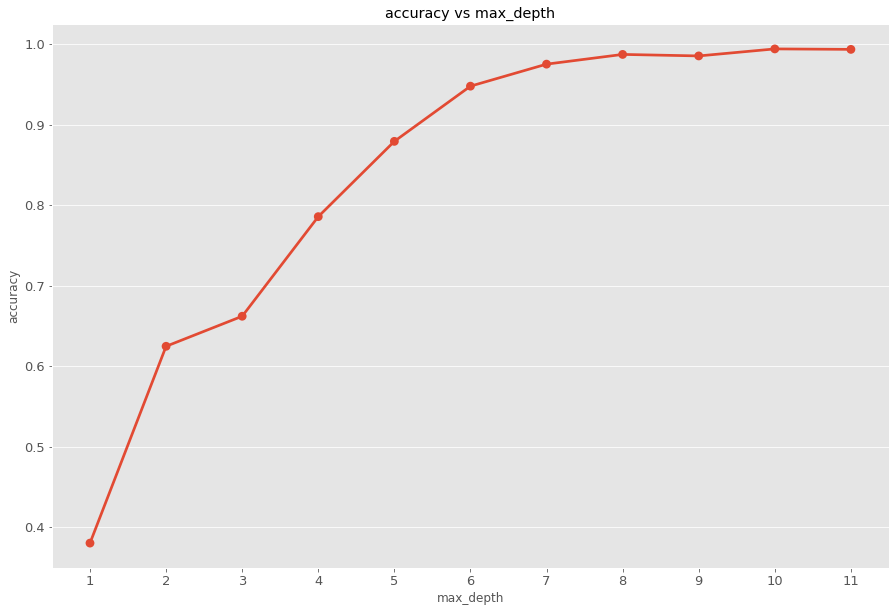

In [21]:
#Finding the Optimal Value For Max Depth
max_depth_range = list(range(1,12))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    reg = DecisionTreeRegressor(max_depth = depth, random_state = 18)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    accuracy.append(score)
    
x=max_depth_range
y=accuracy

plt.figure(figsize=(15,10))
sns.pointplot(x,y)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accuracy vs max_depth')

In [22]:
#Applying  Decision Tree Regressor
X=final_df.drop('customer_value',1)
y=final_df['customer_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)
dt_reg = DecisionTreeRegressor(max_depth=10, random_state = 18)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)
#Evaluation metric
mse =mean_squared_error(y_test,y_pred)
print('mse score:',mse)
print('=='*100)
rmse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(rmse)
print('Rmse score:',rmse)

#accuracy score on train data
train_score=dt_reg.score(X_train,y_train)
print('train score:',train_score)
print('=='*100)

#accuracy score on test data
test_score=dt_reg.score(X_test,y_test)
print('test score:',test_score)
print('=='*100)




mse score: 14329632.343130004
Rmse score: 3785.4500846174165
train score: 0.999472647384594
test score: 0.983527095237234


In [23]:
#Evaluation metric  R2 score
R2_Score=r2_score(y_test,y_pred)
print('R2 score:',R2_Score)
print('=='*100)


R2 score: 0.983527095237234


In [24]:
#Repeated k fold and cross val score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

rkf=RepeatedKFold(n_splits=5, n_repeats=5, random_state=9)


#Crossvalidation process
scores = cross_val_score(dt_reg, X, y, cv=rkf, scoring='r2')
print('scores',scores)
print('=='*100)

print('Mean_score:',scores.mean())
print('=='*100)

print('std_score:',scores.std())

scores [0.99355453 0.9765712  0.77066375 0.98959572 0.90757578 0.99245945
 0.98126047 0.69507851 0.98525604 0.98939246 0.97977426 0.98420149
 0.9882279  0.71185338 0.9833632  0.99070486 0.87724292 0.99301718
 0.8193095  0.989881   0.98622952 0.98406695 0.81670922 0.98093447
 0.98205432]
Mean_score: 0.93395912285369
std_score: 0.09236863821989444


In [25]:
from sklearn.metrics import mean_squared_log_error
#For test
mean_squared_log_error(dt_reg.predict(X_test),y_test)

0.29091147139323775

In [26]:
#For Train
mean_squared_log_error(dt_reg.predict(X_train),y_train)

0.27921696403872304